In [1]:
import igraph as ig
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read the graph
graph = ig.Graph.Read_Edgelist('C:/3rd quarter/ECE 232/Project2/facebook_combined.txt', directed=False)

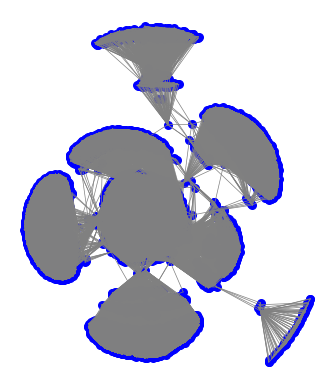

In [5]:
# Visualize the whole graph
# Calculate the layout for the graph (2D)
layout = graph.layout("kk").coords

# Convert layout to a numpy array for easy indexing
layout_np = np.array(layout)

# Extract x and y coordinates of nodes
x, y = layout_np[:, 0], layout_np[:, 1]

# Plot nodes
plt.scatter(x, y, s=30, c='blue', zorder=2)

# Plot edges
for edge in graph.get_edgelist():
    coord1, coord2 = layout_np[edge[0]], layout_np[edge[1]]
    plt.plot([coord1[0], coord2[0]], [coord1[1], coord2[1]], color='grey', linewidth=0.5)

# Customize and show the plot
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')
plt.show()

In [3]:
# Generate personalized networks
# Identify the core node
core_node_1 = 0
core_node_2 = 107
core_node_3 = 348
core_node_4 = 483
core_node_5 = 1086
# Get the ego-network (personalized network) of the core node
ego_network_vertices_1 = graph.neighborhood(core_node_1, order=1)
ego_network1 = graph.subgraph(ego_network_vertices_1)
ego_network_vertices_2 = graph.neighborhood(core_node_2, order=1)
ego_network2 = graph.subgraph(ego_network_vertices_2)
ego_network_vertices_3 = graph.neighborhood(core_node_3, order=1)
ego_network3 = graph.subgraph(ego_network_vertices_3)
ego_network_vertices_4 = graph.neighborhood(core_node_4, order=1)
ego_network4 = graph.subgraph(ego_network_vertices_4)
ego_network_vertices_5 = graph.neighborhood(core_node_5, order=1)
ego_network5 = graph.subgraph(ego_network_vertices_5)

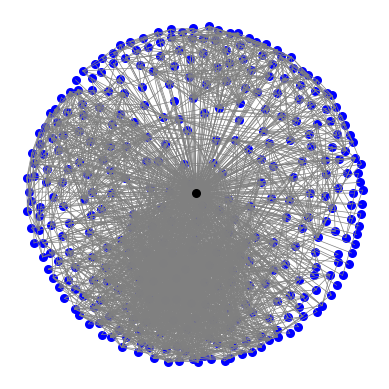

In [29]:
# Visualize the personalized network
# Calculate the layout for the graph (2D)
layout = ego_network1.layout("kk").coords
# Convert layout to a numpy array for easy indexing
layout_np = np.array(layout)
# Extract x and y coordinates of nodes
x, y = layout_np[:, 0], layout_np[:, 1]
# Plot nodes
plt.scatter(x, y, s=30, c='blue', zorder=2)
plt.scatter(layout_np[0, 0], layout_np[0, 1], s=30, c='black', zorder=5)
# Plot edges
for edge in ego_network1.get_edgelist():
    coord1, coord2 = layout_np[edge[0]], layout_np[edge[1]]
    plt.plot([coord1[0], coord2[0]], [coord1[1], coord2[1]], color='grey', linewidth=0.5)
# Customize and show the plot
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')
plt.show()

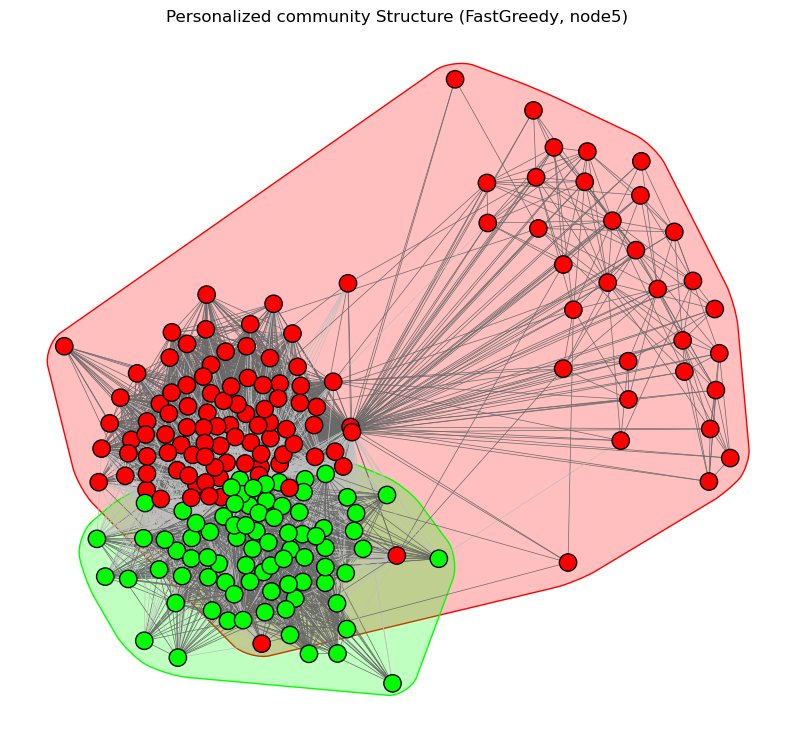

Modularity: 0.14553149956549322
Assortativity: -0.0697765438779641


In [4]:
# Cluster with FastGreedy
fg = ego_network5.community_fastgreedy()
communities = fg.as_clustering()
 
fig, ax = plt.subplots(figsize=(10,10))
 
ax.set_title("Personalized community Structure (FastGreedy, node5)")
 
ig.plot(
    communities,
    target=ax,
    vertex_size=0.2,
    edge_width=0.5,
    mark_groups = True
)
plt.show()
 
# Calculate the modularity of the community structure
modularity = ego_network5.modularity(fg.as_clustering())
print(f"Modularity: {modularity}")
 
# Calculate the assortativity coefficient of the network
assortativity = ego_network5.assortativity_degree()
print(f"Assortativity: {assortativity}")

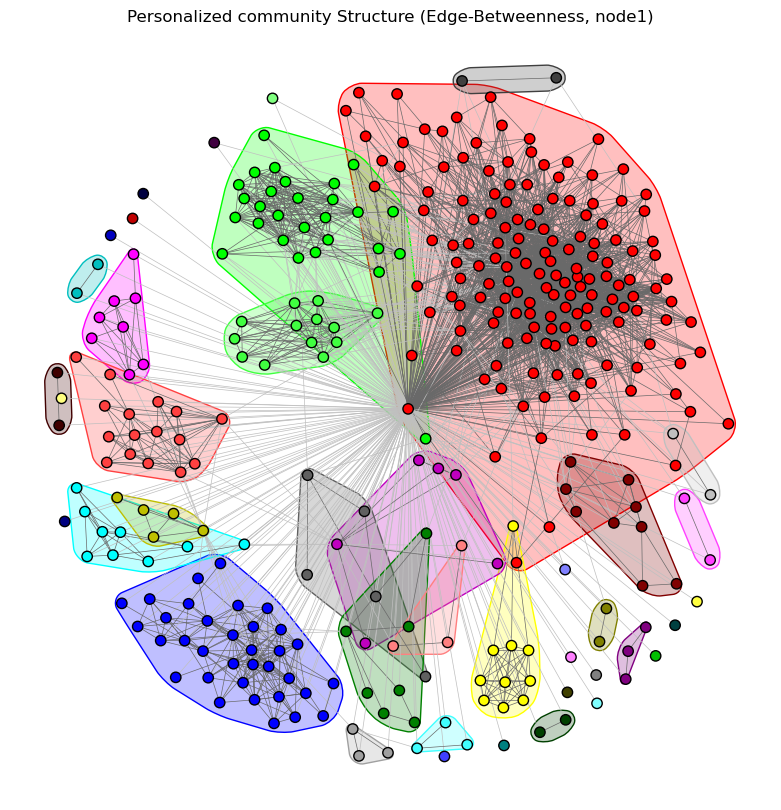

In [46]:
# Cluster with Edge-Betweenness
fg = ego_network1.community_edge_betweenness()
communities = fg.as_clustering()
 
fig, ax = plt.subplots(figsize=(10,10))
 
ax.set_title("Personalized community Structure (Edge-Betweenness, node1)")
 
ig.plot(
    communities,
    target=ax,
    vertex_size=0.2,
    edge_width=0.5,
    mark_groups = True
)
plt.show()

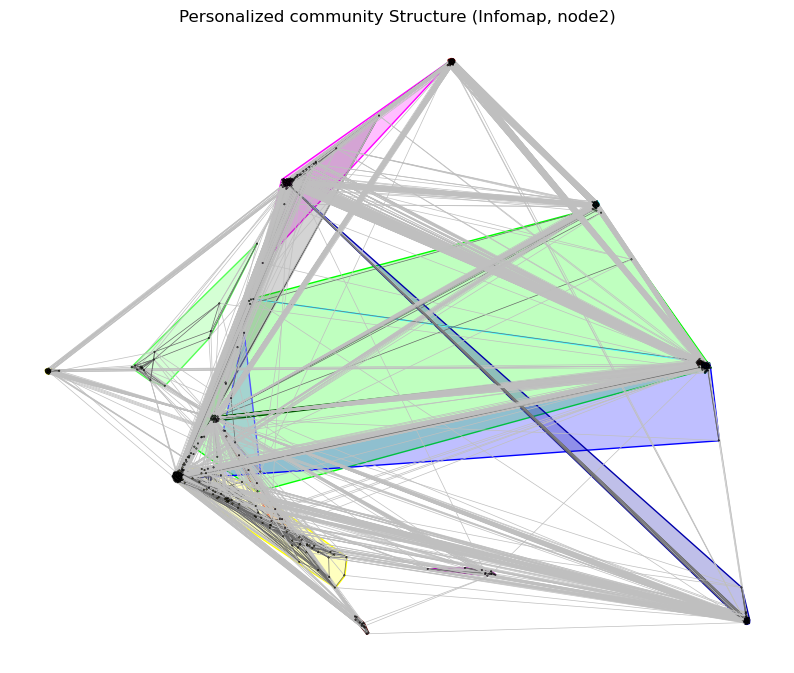

In [54]:
# Cluster with Infomap
communities = ego_network2.community_infomap()
 
fig, ax = plt.subplots(figsize=(10,10))
 
ax.set_title("Personalized community Structure (Infomap, node2)")
 
ig.plot(
    communities,
    target=ax,
    vertex_size=0.2,
    edge_width=0.5,
    mark_groups = True
)
plt.show()

In [5]:
# Delete the core nodes from the ego networks
ego_network_vertices_1 = graph.neighborhood(core_node_1, order=1)
ego_network_vertices_1_no_core = ego_network_vertices_1[1:]
ego_network1_no_core = graph.subgraph(ego_network_vertices_1_no_core)

ego_network_vertices_2 = graph.neighborhood(core_node_2, order=1)
ego_network_vertices_2_no_core = ego_network_vertices_2[1:]
ego_network2_no_core = graph.subgraph(ego_network_vertices_2_no_core)

ego_network_vertices_3 = graph.neighborhood(core_node_3, order=1)
ego_network_vertices_3_no_core = ego_network_vertices_3[1:]
ego_network3_no_core = graph.subgraph(ego_network_vertices_3_no_core)

ego_network_vertices_4 = graph.neighborhood(core_node_4, order=1)
ego_network_vertices_4_no_core = ego_network_vertices_4[1:]
ego_network4_no_core = graph.subgraph(ego_network_vertices_4_no_core)

ego_network_vertices_5 = graph.neighborhood(core_node_5, order=1)
ego_network_vertices_5_no_core = ego_network_vertices_5[1:]
ego_network5_no_core = graph.subgraph(ego_network_vertices_5_no_core)

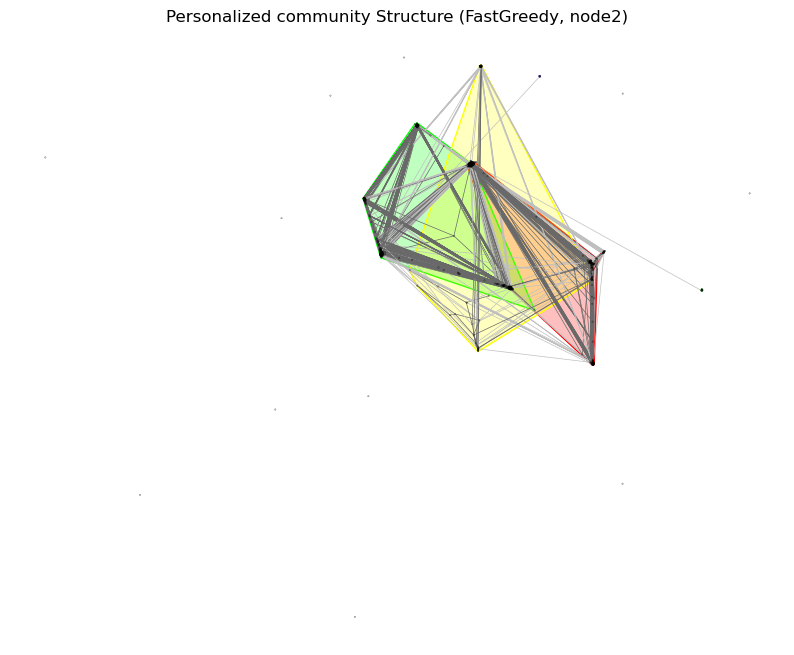

In [75]:
# Cluster with FastGreedy
fg = ego_network2_no_core.community_fastgreedy()
communities = fg.as_clustering()
 
fig, ax = plt.subplots(figsize=(10,10))
 
ax.set_title("Personalized community Structure (FastGreedy, node2)")
 
ig.plot(
    communities,
    target=ax,
    vertex_size=0.2,
    edge_width=0.5,
    mark_groups = True
)
plt.show()

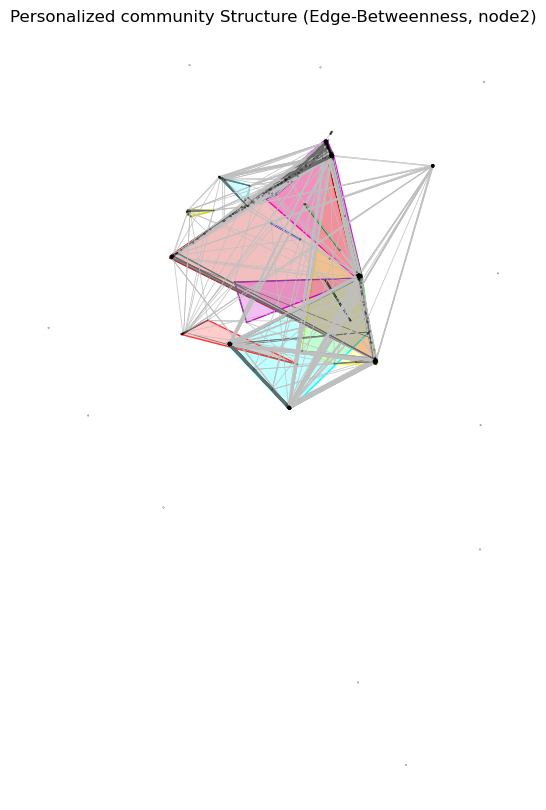

In [76]:
# Cluster with Edge-Betweenness
fg = ego_network2_no_core.community_edge_betweenness()
communities = fg.as_clustering()
 
fig, ax = plt.subplots(figsize=(10,10))
 
ax.set_title("Personalized community Structure (Edge-Betweenness, node2)")
 
ig.plot(
    communities,
    target=ax,
    vertex_size=0.2,
    edge_width=0.5,
    mark_groups = True
)
plt.show()

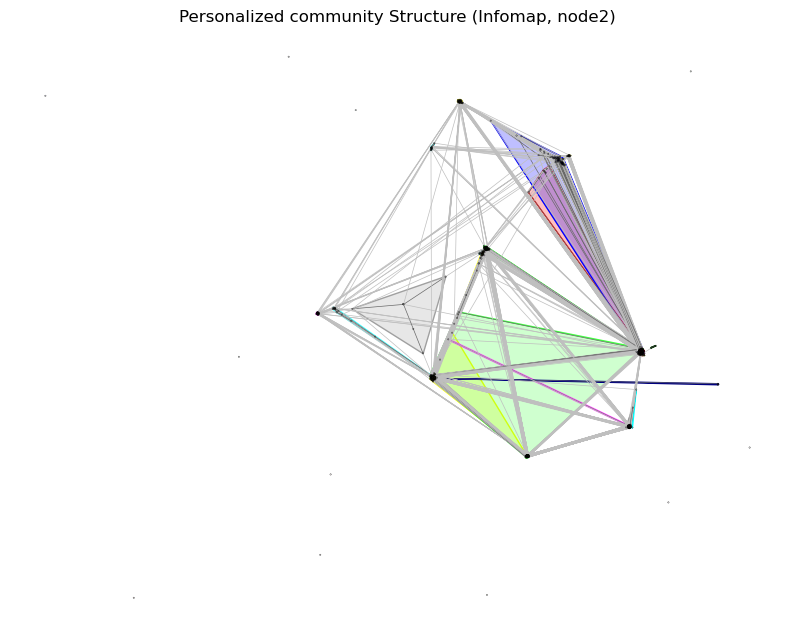

In [77]:
# Cluster with Infomap
communities = ego_network2_no_core.community_infomap()
 
fig, ax = plt.subplots(figsize=(10,10))
 
ax.set_title("Personalized community Structure (Infomap, node2)")
 
ig.plot(
    communities,
    target=ax,
    vertex_size=0.2,
    edge_width=0.5,
    mark_groups = True
)
plt.show()

In [6]:
# Function for dispersion
def mutual_friends(ego_graph, node, core_node):
    node_neighbors = set(ego_graph.neighbors(node))
    return node_neighbors

def calculate_dispersion(ego_graph, node, core_node):
    # Find mutual friends
    mutual_friends_set = mutual_friends(ego_graph, node, core_node)

    # Create a modified graph by removing the node and the core node
    modified_ego_graph = graph.copy()
    modified_ego_graph.delete_vertices([node, core_node])

    # Calculate shortest distances between each pair of mutual friends
    shortest_distances = []
    mutual_friends_list = list(mutual_friends_set)
    for i in range(len(mutual_friends_list)):
        for j in range(i + 1, len(mutual_friends_list)):
            distance = modified_ego_graph.distances(source=mutual_friends_list[i], target=mutual_friends_list[j])[0][0]
            if distance == float('inf'):
                distance = 0
            shortest_distances.append(distance)
    # Calculate the dispersion as the sum of shortest distances
    dispersion = sum(shortest_distances)
    return dispersion

In [7]:
# ego_network1, calculate the embeddedness and the dispersion
E1 = []
D1 = []
core_node = 0
Node = set(graph.neighbors(core_node))
for k in range(len(Node)):
    degree = mutual_friends(ego_network1, k, core_node)
    e = len(degree)
    E1.append(e) # Record all the embeddedness
    d = calculate_dispersion(ego_network1, k, core_node)
    D1.append(d) # Record all the despersion

# ego_network2, calculate the embeddedness and the dispersion
E2 = []
D2 = []
core_node = 107
Node = set(graph.neighbors(core_node))
for k in range(len(Node)):
    degree = mutual_friends(ego_network2, k, core_node)
    e = len(degree)
    E2.append(e) # Record all the embeddedness
    d = calculate_dispersion(ego_network2, k, core_node)
    D2.append(d)

In [9]:
# ego_network 3,4,5
E3 = []
D3 = []
core_node = 348
Node = graph.neighbors(core_node)
for k in range(len(Node)):
    degree = mutual_friends(ego_network3_no_core, k, core_node)
    e = len(degree)
    E3.append(e) # Record all the embeddedness
    d = calculate_dispersion(ego_network3, k, core_node)
    D3.append(d)

E4 = []
D4 = []
core_node = 483
Node = set(graph.neighbors(core_node))
for k in range(len(Node)):
    degree = mutual_friends(ego_network4, k, core_node)
    e = len(degree)
    E4.append(e) # Record all the embeddedness
    d = calculate_dispersion(ego_network4, k, core_node)
    D4.append(d)

E5 = []
D5 = []
core_node = 1086
Node = set(graph.neighbors(core_node))
for k in range(len(Node)):
    degree = mutual_friends(ego_network5, k, core_node)
    e = len(degree)
    E5.append(e) # Record all the embeddedness
    d = calculate_dispersion(ego_network5, k, core_node)
    D5.append(d)

(0.0, 45000.0)

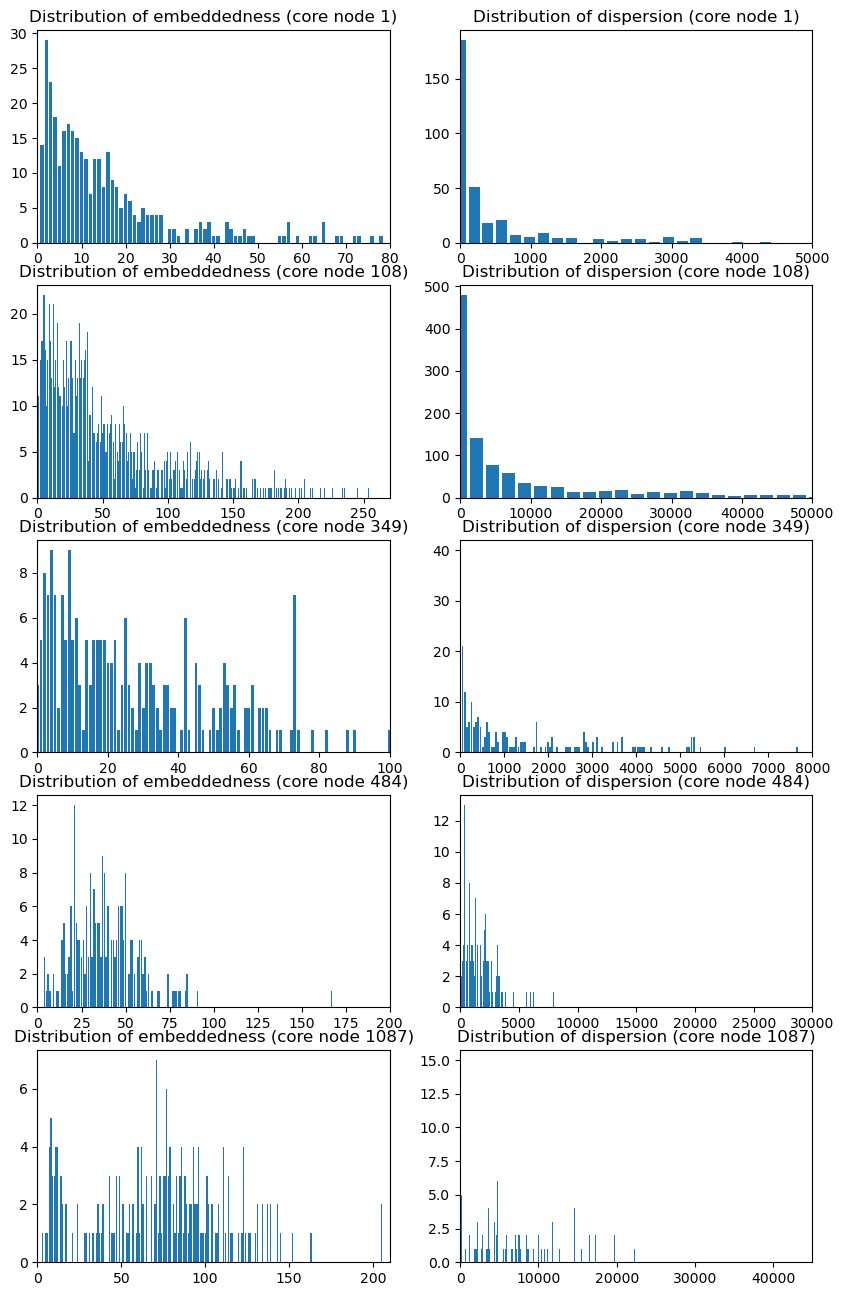

In [16]:
import seaborn as sns
fig,ax = plt.subplots(5,2,figsize = (10,16))

plt.sca(ax[0,0])
plt.title('Distribution of embeddedness (core node 1)')
degree_hist = plt.hist(E1, bins=range(min(E1), max(E1)+2), align='left', rwidth=0.8, density=False)
plt.xlim(0,80)
plt.sca(ax[0,1])
plt.title('Distribution of dispersion (core node 1)')
degree_hist = plt.hist(D1,bins=1000, align='left', rwidth=0.8, density=False)
plt.xlim(0,5000)

plt.sca(ax[1,0])
plt.title('Distribution of embeddedness (core node 108)')
degree_hist = plt.hist(E2, bins=range(min(E2), max(E2)+2), align='left', rwidth=0.8, density=False)
plt.xlim(0,270)
plt.sca(ax[1,1])
plt.title('Distribution of dispersion (core node 108)')
degree_hist = plt.hist(D2, bins=1000, align='left', rwidth=0.8, density=False)
plt.xlim(0,50000)

plt.sca(ax[2,0])
plt.title('Distribution of embeddedness (core node 349)')
degree_hist = plt.hist(E3, bins=range(min(E3), max(E3)+2), align='left', rwidth=0.8, density=False)
plt.xlim(0,100)
plt.sca(ax[2,1])
plt.title('Distribution of dispersion (core node 349)')
degree_hist = plt.hist(D3, bins=1000, align='left', rwidth=0.8, density=False)
plt.xlim(0,8000)

plt.sca(ax[3,0])
plt.title('Distribution of embeddedness (core node 484)')
degree_hist = plt.hist(E4, bins=range(min(E4), max(E4)+2), align='left', rwidth=0.8, density=False)
plt.xlim(0,200)
plt.sca(ax[3,1])
plt.title('Distribution of dispersion (core node 484)')
degree_hist = plt.hist(D4, bins=1000, align='left', rwidth=0.8, density=False)
plt.xlim(0,30000)

plt.sca(ax[4,0])
plt.title('Distribution of embeddedness (core node 1087)')
degree_hist = plt.hist(E5, bins=range(min(E5), max(E5)+2), align='left', rwidth=0.8, density=False)
plt.xlim(0,210)
plt.sca(ax[4,1])
plt.title('Distribution of dispersion (core node 1087)')
degree_hist = plt.hist(D5, bins=1000, align='left', rwidth=0.8, density=False)
plt.xlim(0,45000)

In [139]:
core_node = 1086
# Index the maximum E node
max_index_E5 = np.argmax(E5)+2
# Convert the set of neighbors to a list
Node1 = list(graph.neighbors(core_node))
# Get the desired node using the index
node1 = max_index_E5

# Index the maximum D node
max_index_D5 = np.argmax(D5)
Node2 = list(graph.neighbors(core_node))
node2 = max_index_D5

# Index the maximum D/E node
# non-zero E
E = np.array(E5)
D = np.array(D5)
E[E==0]=100 # set a large number
Rate = D/E
node3 = np.argmax(Rate)+12

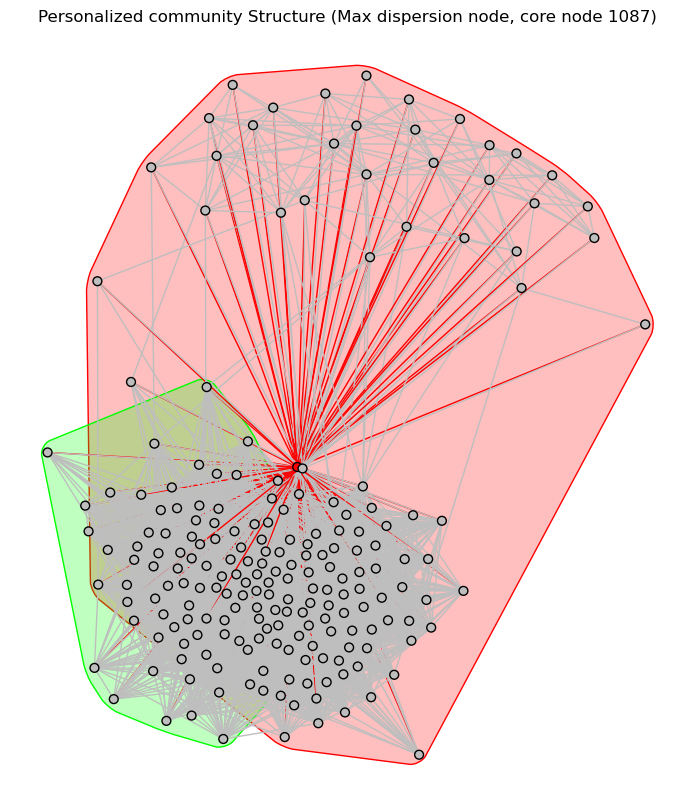

In [78]:
# Define the position of nodes for the plot
layout = ego_network5.layout("fr")
# Convert layout positions to a dictionary for use with matplotlib
pos = {vertex: layout[vertex] for vertex in range(ego_network5.vcount())}
# Cluster with FastGreedy (Maximum dispersion)
fg = ego_network5.community_fastgreedy()
communities = fg.as_clustering()

fig, ax = plt.subplots(figsize=(10,10))

ax.set_title("Personalized community Structure (Max dispersion node, core node 1087)")

# Set the colors for nodes and edges
node_colors = ["gray" if node != node2 else "red" for node in range(ego_network5.vcount())]
edge_colors = ["gray" if edge_tuple not in ego_network5.es.select(_source=node2) and edge_tuple not in ego_network5.es.select(_target=node2) else "red" for edge_tuple in ego_network5.es]

# Plot the graph with highlighted node1 and its edges
ig.plot(
    communities,
    target=ax,
    layout=layout,
    vertex_color=node_colors,
    edge_color=edge_colors,
    vertex_size=0.1,
    edge_width=1.0,
    mark_groups=True,
)

plt.show()



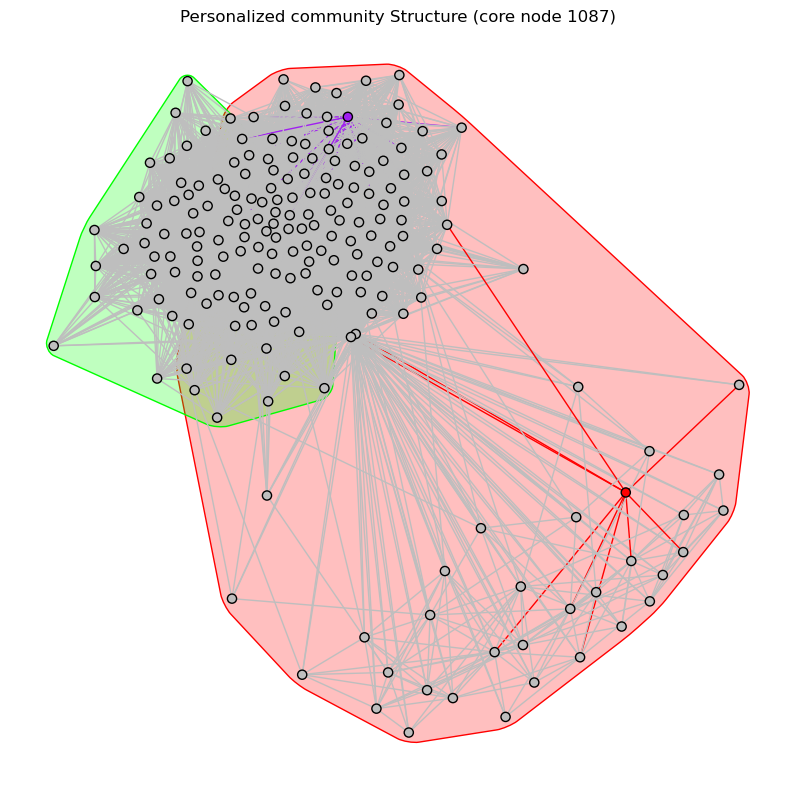

In [140]:
# Define the position of nodes for the plot
layout = ego_network5.layout("fr")
# Convert layout positions to a dictionary for use with matplotlib
pos = {vertex: layout[vertex] for vertex in range(ego_network5.vcount())}
# Cluster with FastGreedy
fg = ego_network5.community_fastgreedy()
communities = fg.as_clustering()

fig, ax = plt.subplots(figsize=(10,10))

ax.set_title("Personalized community Structure (core node 1087)")

# Set the colors for nodes and edges
node_colors = ["gray" if (node != node1)&(node != node3) else "red" if node==node1 else "purple" for node in range(ego_network5.vcount())]
edge_colors = ["red" if edge_tuple in ego_network5.es.select(_source=node1) or edge_tuple in ego_network5.es.select(_target=node1) else "purple" if edge_tuple in ego_network5.es.select(_source=node3) or edge_tuple in ego_network5.es.select(_target=node3) else "grey" for edge_tuple in ego_network5.es]

# Plot the graph with highlighted node1 and its edges
ig.plot(
    communities,
    target=ax,
    layout=layout,
    vertex_color=node_colors,
    edge_color=edge_colors,
    vertex_size=0.1,
    edge_width=1.0,
    mark_groups=True,
)

plt.show()

In [ ]:
# Plot the maximum D/E
# Delete the nodes where E = 0
zero_indices = np.where(array == 0)
Nodes = set(graph.neighbors(core_node))
nodes = Node[max_index_E]
ego_network_no_core.delete_vertices(nodes)